## Ingeniería de metadatos

La ingeniería de metadatos (“feature engineering”) es una de las opciones para mejorar modelos de machine learning. Podemos crear nuevas variables (“nuevos features”), o bien transformarlas, adaptarlas o normalizarlas para que los modelos puedan realizar un uso más depurado de las mismas. 

En este notebook, vamos a explorar las técnicas más comunes que podemos utilizar para mejorar nuestros datasets.


### Limpieza

En ocaciones es conveniente eliminar algunas columnas, o bien cambiar los tipos (int, float, datetime etc). En nuestro dataset de carros, vamos a eliminar el nombre de los carros y vamos a “castear” las variables a un tipo numérico. 

In [10]:
import pandas as pd

data = pd.read_csv("data/auto-mpg.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [11]:
# Eliminar una columna (drop)
data.drop('car name',axis=1,inplace=True)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [12]:
# Las columnas son tipo object, vamos a convertir los datos en tipo numerico

# convertir columnas en datos numericos
for c in data.columns:
    data[c] = pd.to_numeric(data[c], errors ='coerce')
    
# coerce conviete datos invalidos en NaN

<AxesSubplot:>

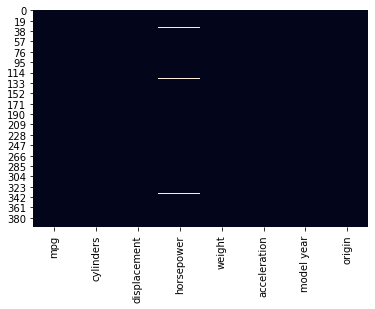

In [13]:
# vamos a revisar a ver si existen columnas con valores NaN. Para esto podemos usar Seaborn!
#!pip3 install seaborn

import seaborn as sns

sns.heatmap(data.isnull(), cbar=False)

<AxesSubplot:>

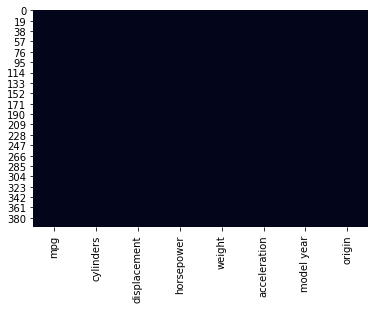

In [14]:
# vamos a reemplazar los valores nulos por la mediana. (mediana vs media?)
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].median())

# vamos a revisar si los valores nulos
sns.heatmap(data.isnull(), cbar=False)

### Interacciones

Las interacciones son uniones de 2 o más variables para crear una nueva. Las interacciones se pueden ejecutar con variables numéricas o categóricas.

Si encontramos una relacion entre dos variables, podemos combinarlas en una sola variable. Vamos a realizar esto con las columnas "horsepower" y "acceleration". Podemos realizar tantas interacciones como queramos, pero no todas van a contribuir con la capacidad predictiva del modelo.

**Nota** las interacciones pueden ayudar en mejorar la capacidad predictiva, pero disminuyen la interpretabilidad del modelo. Por ejemplo, que significa hp_acc = 1560 ?

In [ ]:
# vamos a crear una nueva columna: hp_acc
data["hp_acc"] = data["horsepower"] * data["acceleration"]

data.head()

tambien podemos crear interacciones con variables de texto o categoricas. veamos el ejemplo del dataset de Kaggle de los restaurantes de Chipotle en Estados Unidos. 

In [ ]:
data = pd.read_csv("data/chipotle_stores.csv")
data.head()

In [ ]:
# Vamos a crear una nueva columna donde combinamos el state y location en una sola columna, 
# y eliminanamos state y location.

data["st_loc"] = data["state"] + "_" +  data["location"]
data["st_loc"] = data["st_loc"].astype('category')

# eliminamos las variables individuales
data.drop('state',axis=1,inplace=True)
data.drop('location',axis=1,inplace=True)

data.head()

In [ ]:
# revismos cuantas categorias hay en st_loc
data["st_loc"].cat.categories.unique()

### Normalizacion

Muchos algoritmos de aprendizaje automático son sensibles a las dimensiones, grados de libertad y magnitudes de las columnas de los dataset. Por tanto es importante conocer algunas formas de reducir este impacto mediante técnicas de normalizacion: escalamiento y estandarización. 

#### Escalas

Cuando pensamos en escalas, tratamos de transformar los datos de su estado actual a un rango tal como [0,1] o [-1,1]. Cuando escalamos datos, la distribución de los datos no cambia, solamente cambiamos la proporción. Esta técnica es particularmente útil para algoritmos sensibles a las distancias entre los datos tales como SVM y KNN. 

A continuación, vamos a explorar las técnicas más populares de “scaling” con Sklearn.

Existen otras opciones tambien como:
- Student t-statistic
- Standarized Moment

#### **MinMaxScaler**

Transforma los datos en el rango de [0,1]

Fórmula:

$x_{scaled}=\frac{x-min(X)}{max(X)-min(X)}$

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

X = np.array([-10,-5,4,1,0,2,4,6,8,10]).reshape(-1,1)
scaler = MinMaxScaler().fit(X)

scaler.transform(X)

#### **StandardScaler**

Esta técnica hace que la media de los datos generados sea 0 con una desviación standard de 0.  Esto causa que el 68% de los datos quede entre -1 y 1.

Fórmula:

$z=\frac{x-u}{s}$

donde:
- u: es la media del training set
- s: es la desviacion standard

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

X = np.array([-10,-5,4,1,0,2,4,6,8,10]).reshape(-1,1)
scaler = StandardScaler().fit(X)

scaler.transform(X)

#### **RobustScaler**

Esta técnica hace uso de estadísticas que son robustas en la presencia de “outliers”. Es similar al MinMaxScaler, solo que en lugar de usar el min y el max, usa el IQR.

Este escalador elimina la mediana y escala los datos de acuerdo con el rango de cuantiles (el valor predeterminado es IQR: rango intercuartílico). El IQR es el rango entre el primer cuartil (cuantil 25) y el tercer cuartil (cuantil 75).

Fórmula:

$x_{scaled}=\frac{x-Q_1(x)}{Q_3(x)-x-Q_1(x)}$

donde:
- Q: son los IQRs

<a href="https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/measuring-spread-quantitative/v/calculating-interquartile-range-iqr">Que es el IQR?</a>

In [ ]:
from sklearn.preprocessing import RobustScaler
import numpy as np

X = np.array([-10,-5,4,1,0,2,4,6,8,10,1000]).reshape(-1,1)
scaler = RobustScaler().fit(X)

scaler.transform(X)

#### Estandarización (Transformaciones)

#### **Mapeo de datos hacia una distribución Gaussiana (Box-Cox & Yeo-johnson)** 

Esta es una técnica útil cuando los datos presentan heterocedasticidad.  Algo que pasa con regularidad en modelos de regresión lineal.

PowerTransformer permite la transformación Box-Cox y la transformación Yeo-Johnson. Box-Cox requiere que los datos de entrada sean estrictamente positivos, mientras que Yeo-Johnson admite datos tanto positivos como negativos.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
data = pd.read_csv('https://gist.githubusercontent.com/sachinsdate/c2a92fd009c62fee9364c835aff7e2f0/raw/424abc43c42647f5d8831241ee92c7d3093dc610/monthly_gold_price_index_fred.csv')

plt.scatter(data.DATE, data.Export_Price_Index_of_Gold)
plt.xticks([])
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import PowerTransformer # Yeo-johnson por defecto.

x = data.Export_Price_Index_of_Gold

pt = PowerTransformer().fit(np.array(x).reshape(-1,1))
price = pt.transform(np.array(x).reshape(-1,1))

plt.scatter(data.DATE, price)
plt.xticks([])
plt.show()

#### Transformacion con np.log

In [ ]:
x = data.Export_Price_Index_of_Gold
price = np.array(x).reshape(-1,1)

# Log Transform!
price = np.log(price)

plt.scatter(data.DATE, price)
plt.xticks([])
plt.show()

#### **Normalización L1 y L2**

La normalización es el proceso de escalar muestras individuales para tener una norma unitaria. Esto permite calcular la magnitud de los vectores o matrices. 

- L1: es la suma de los values absolutos del vector. L1(v) = ||v||1
- L2: es raiz de la suma de los de los valores del vector al cuadrado. L2(v) = sqrt(a1^2 + ... + ak^2)

In [ ]:
from sklearn.preprocessing import normalize

X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]

X_normalized = normalize(X, norm='l2')

X_normalized

In [ ]:
from sklearn.preprocessing import normalize

X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]

X_normalized = normalize(X, norm='l1')

X_normalized